In [3]:
import pandas as pd
import numpy as np
import string
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [29]:
from nltk.sentiment import vader
import nltk
import matplotlib.pyplot as plt
import requests
from collections import Counter
import pandas as pd
import numpy as np
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from pywaffle import Waffle
from wordcloud import WordCloud



In [6]:
df = pd.read_csv(r"D:\coding\python programming\Prodigy_DS_Task-4\archive\twitter_training.csv")
data = pd.read_csv(r"D:\coding\python programming\Prodigy_DS_Task-4\archive\twitter_validation.csv")

In [8]:
df.head()

,2401,Borderlands,Positive,"im getting on borderlands and i will murder you all ,"
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...


In [9]:
df

,2401,Borderlands,Positive,"im getting on borderlands and i will murder you all ,"
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...
...,...,...,...,...
74676,9200,Nvidia,Positive,Just realized that the Windows partition of my...
74677,9200,Nvidia,Positive,Just realized that my Mac window partition is ...
74678,9200,Nvidia,Positive,Just realized the windows partition of my Mac ...
74679,9200,Nvidia,Positive,Just realized between the windows partition of...


In [12]:
df.shape

(74681, 4)

In [13]:
df.columns

Index(['2401', 'Borderlands', 'Positive',
       'im getting on borderlands and i will murder you all ,'],
      dtype='object')

In [16]:
df.isnull().sum()/len(df)*100

2401                                                     0.000000
Borderlands                                              0.000000
Positive                                                 0.000000
im getting on borderlands and i will murder you all ,    0.918574
dtype: float64

In [18]:
#drop any rows with missing values
df = df.replace('unknown', pd.NA)

df = df.dropna()   

In [21]:
#create preprocess text function
def preprocess_text(text):
    #tokenize the text
    tokens = word_tokenize(text.lower())
    
    #remove stop words
    filtered_tokens = [token for token in tokens if token not in stopwords.words('english')]
    
     # lemmatize the tokens
    lemmatizer = WordNetLemmatizer()
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in filtered_tokens]

     # join the tokens back into a string
    processed_text = ' '.join(lemmatized_tokens)
    return processed_text

In [32]:
df.columns = ['id', 'game', 'review', 'words']
data.columns = ['id', 'game', 'review', 'words']

In [33]:
df

,id,game,review,words
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...
...,...,...,...,...
74676,9200,Nvidia,Positive,Just realized that the Windows partition of my...
74677,9200,Nvidia,Positive,Just realized that my Mac window partition is ...
74678,9200,Nvidia,Positive,Just realized the windows partition of my Mac ...
74679,9200,Nvidia,Positive,Just realized between the windows partition of...


In [34]:
df.describe(include='all')

,id,game,review,words
count,73995.000000,73995,73995,73995
unique,NaN,32,4,69490
top,NaN,LeagueOfLegends,Negative,"At the same time, despite the fact that there ..."
freq,NaN,2377,22358,172
mean,6430.333685,NaN,NaN,NaN
std,3737.655932,NaN,NaN,NaN
min,1.000000,NaN,NaN,NaN
25%,3194.000000,NaN,NaN,NaN
50%,6418.000000,NaN,NaN,NaN
75%,9595.000000,NaN,NaN,NaN


In [35]:
id_types = df['id'].value_counts()
id_types

id
9200     6
9199     6
2402     6
2403     6
2404     6
        ..
1959     3
1880     3
1929     3
11190    3
11198    3
Name: count, Length: 12447, dtype: int64

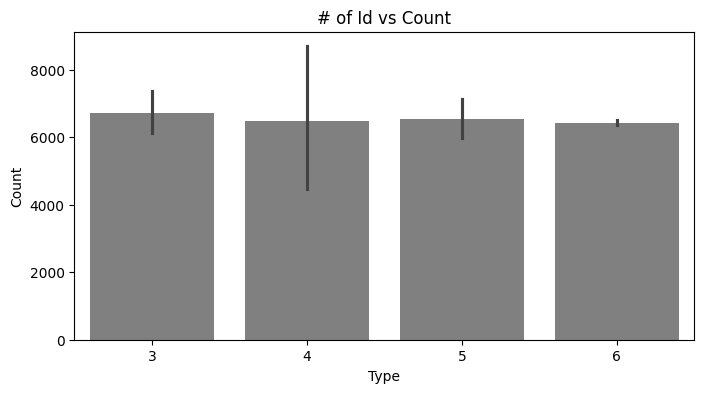

In [39]:
plt.figure(figsize=(8,4))
sns.barplot(y=id_types.index, x=id_types.values, color='grey')  
plt.xlabel('Type')
plt.ylabel('Count')
plt.title('# of Id vs Count')
plt.show()

In [40]:
game_types = data['game'].value_counts()
game_types

game
RedDeadRedemption(RDR)               40
johnson&johnson                      39
PlayerUnknownsBattlegrounds(PUBG)    38
FIFA                                 38
LeagueOfLegends                      37
ApexLegends                          36
Nvidia                               35
TomClancysRainbowSix                 35
GrandTheftAuto(GTA)                  35
Amazon                               34
Fortnite                             34
PlayStation5(PS5)                    33
AssassinsCreed                       33
Borderlands                          33
Hearthstone                          32
CS-GO                                32
Facebook                             32
Overwatch                            32
Verizon                              32
CallOfDuty                           31
Cyberpunk2077                        30
WorldOfCraft                         30
MaddenNFL                            29
Microsoft                            28
Dota2                              

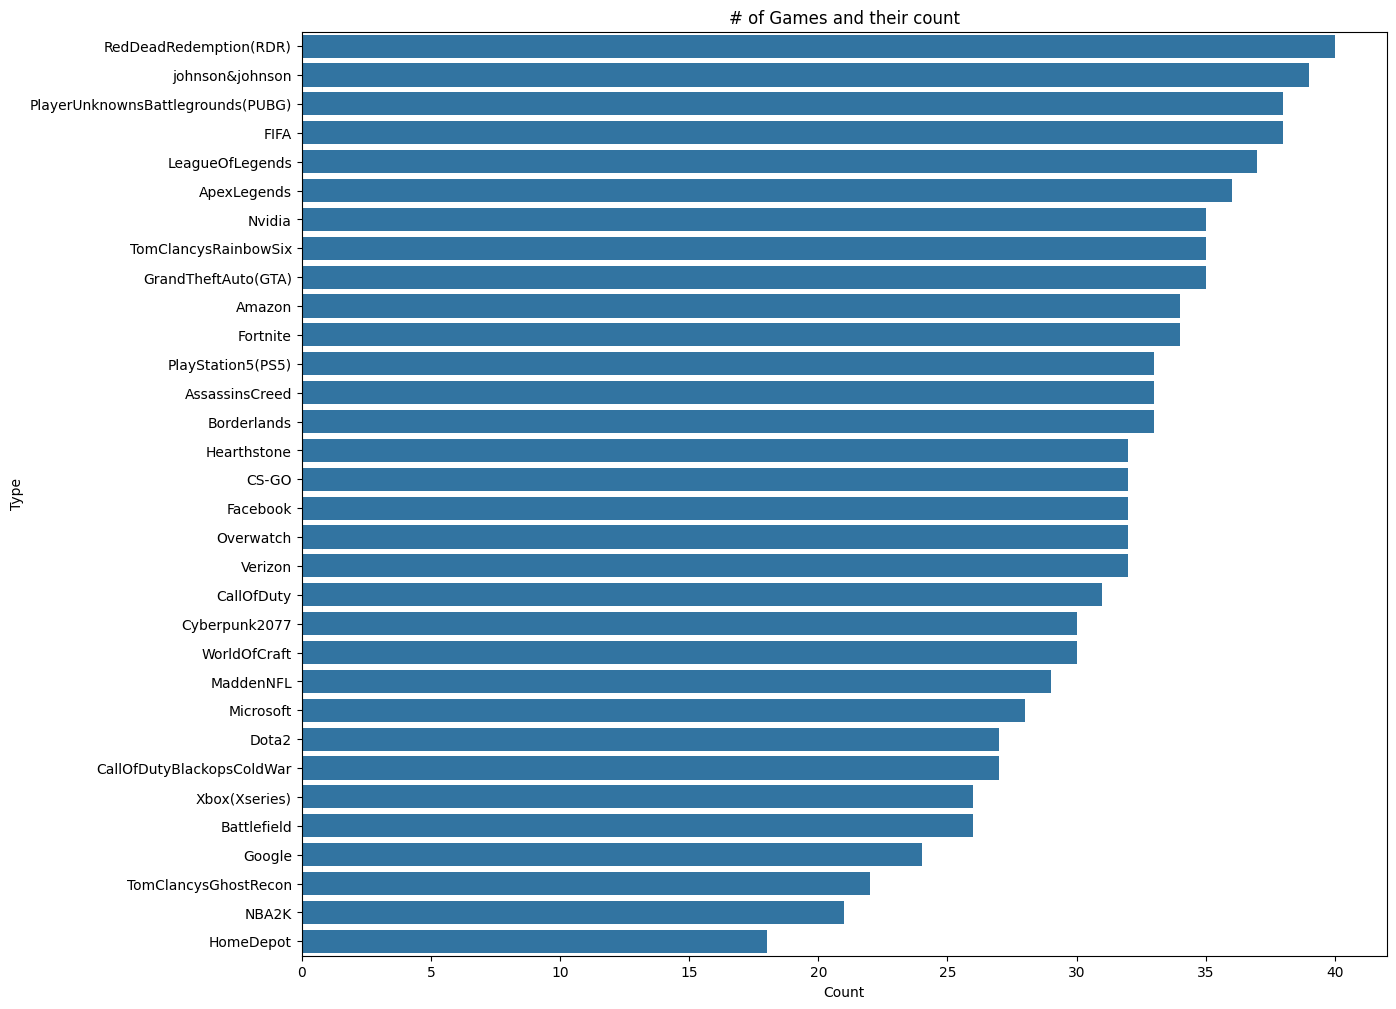

In [42]:
plt.figure(figsize=(14,12))

sns.barplot(x=game_types.values,y=game_types.index)  
plt.title('# of Games and their count')
plt.ylabel('Type')
plt.xlabel('Count')

plt.show()

In [47]:
total_null=df.isnull().sum().sort_values(ascending=False)
percent = ((df.isnull().sum()/df.isnull().count())*100).sort_values(ascending = False)
print("Total records = ", df.shape[0])
missing_df = pd.concat([total_null,percent.round(2)],axis=1,keys=['Total Missing','In Percent'])
missing_df.head(10)

Total records =  73995


,Total Missing,In Percent
id,0,0.0
game,0,0.0
review,0,0.0
words,0,0.0


In [48]:
df.dropna(subset=['words'],inplace=True)

total_null=df.isnull().sum().sort_values(ascending=False)
percent = ((df.isnull().sum()/df.isnull().count())*100).sort_values(ascending = False)
print("Total records = ", df.shape[0])
missing_df = pd.concat([total_null,percent.round(2)],axis=1,keys=['Total Missing','In Percent'])
missing_df.head(10)

Total records =  73995


,Total Missing,In Percent
id,0,0.0
game,0,0.0
review,0,0.0
words,0,0.0


In [49]:
train0=df[df['review']=="Negative"]
train1=df[df['review']=="Positive"]
train2=df[df['review']=="Irrelevant"]
train3=df[df['review']=="Neutral"]

In [50]:
train0.shape, train1.shape, train2.shape, train3.shape

((22358, 4), (20654, 4), (12875, 4), (18108, 4))

In [52]:
df=pd.concat([train0,train1,train2,train3],axis=0)

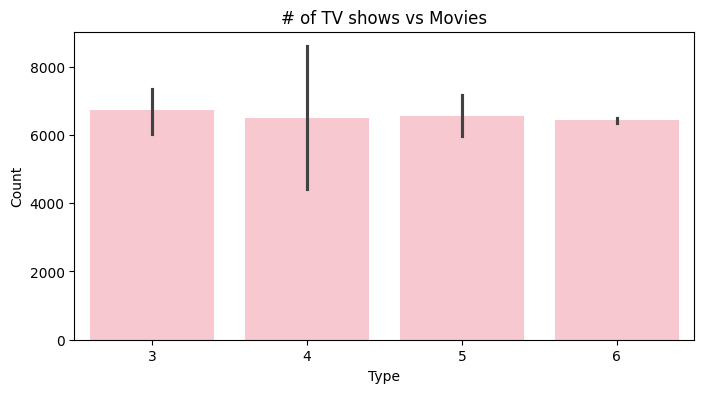

In [59]:
plt.figure(figsize=(8,4))
sns.barplot(x=id_types.values,y=id_types.index,color='pink')

plt.xlabel('Type')
plt.ylabel('Count')
plt.title('# of TV shows vs Movies')
plt.show()

In [54]:
game_types = df['game'].value_counts()
game_types

game
LeagueOfLegends                      2377
MaddenNFL                            2377
CallOfDuty                           2376
Verizon                              2365
TomClancysRainbowSix                 2364
Facebook                             2362
Microsoft                            2361
Dota2                                2359
WorldOfCraft                         2357
ApexLegends                          2353
NBA2K                                2343
CallOfDutyBlackopsColdWar            2343
johnson&johnson                      2324
FIFA                                 2324
TomClancysGhostRecon                 2321
Overwatch                            2316
Battlefield                          2316
GrandTheftAuto(GTA)                  2293
HomeDepot                            2292
PlayStation5(PS5)                    2291
Hearthstone                          2286
CS-GO                                2284
Xbox(Xseries)                        2283
Borderlands                  

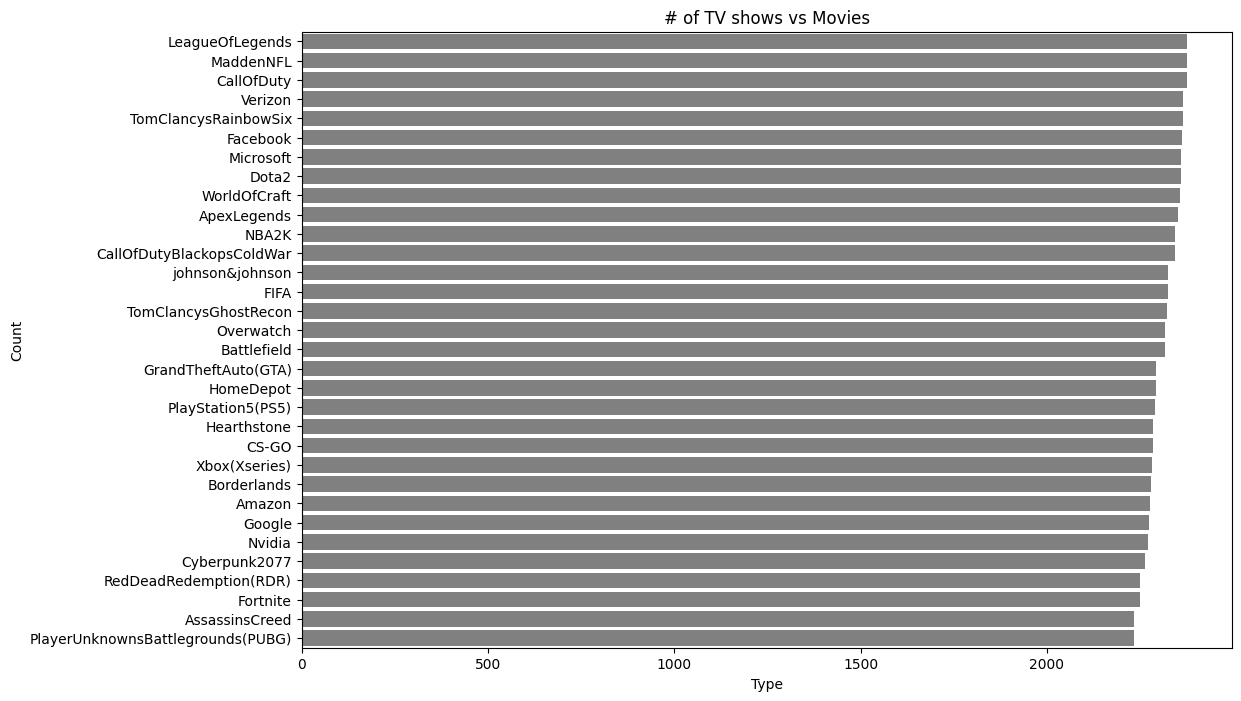

In [58]:
plt.figure(figsize=(12,8))
sns.barplot(x=game_types.values,y=game_types.index,color='grey')

plt.xlabel('Type')
plt.ylabel('Count')
plt.title('# of TV shows vs Movies')
plt.show()

In [60]:
review_types = data['review'].value_counts()
review_types

review
Neutral       285
Positive      277
Negative      266
Irrelevant    171
Name: count, dtype: int64

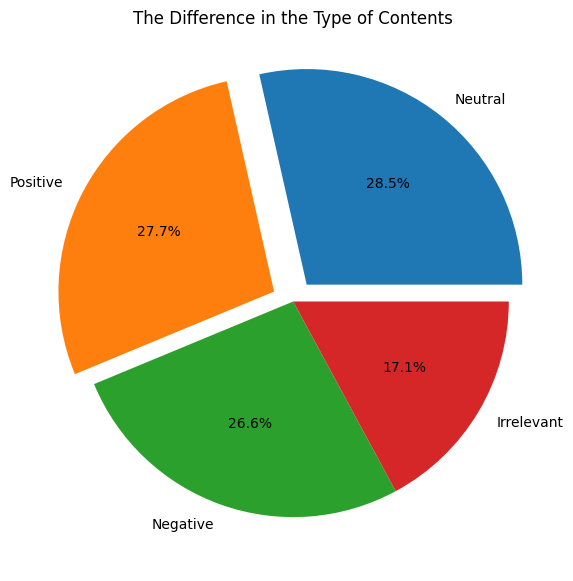

In [61]:
plt.figure(figsize=(12,7))
plt.pie(x=review_types.values, labels=review_types.index, autopct='%.1f%%', explode=[0.1, 0.1,0,0])
plt.title('The Difference in the Type of Contents')
plt.show()

In [65]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()

In [67]:
df['review']=label_encoder.fit_transform(df['review'])
df['game']=label_encoder.fit_transform(df['game'])
data['review']=label_encoder.fit_transform(data['review'])
data['game']=label_encoder.fit_transform(data['game'])

In [68]:
df = df.drop(['id'],axis=1)

df

,game,review,words
23,4,1,the biggest dissappoinment in my life came out...
24,4,1,The biggest disappointment of my life came a y...
25,4,1,The biggest disappointment of my life came a y...
26,4,1,the biggest dissappoinment in my life coming o...
27,4,1,For the biggest male dissappoinment in my life...
...,...,...,...
74658,21,2,"Nvidia plans to release its 2017 ""Crypto Craze..."
74659,21,2,"Nvidia does not want to give up its ""cryptoins..."
74660,21,2,Nvidia doesn’t intend to give away its 2017 ad...
74661,21,2,Nvidia therefore doesn ’ t want to give up its...


In [69]:
data.nunique()

id        999
game       32
review      4
words     998
dtype: int64

In [70]:
df.nunique()

game         32
review        4
words     69490
dtype: int64